In [2]:
import math
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
out = []
x=1
y=0.5

EPSILON = 1e-10

def Txy(x,y, C0, C1, C2, a, b):
  H=1
  L=1
  a=1
  b=1
    #n=50
    # Compute Fourier seriesi
  #A0=0
  T=0


  for i in range(1):
      #in_list = []
      for n in range(1,50):
        a1=((C0*b)/(n*math.pi))*(1-math.cos((n*math.pi)))
        #a2=((C1*b*b)/(n*n*math.pi*math.pi))*(1-math.cos((n*math.pi)))
        a2=-((C1*b*b)/(math.pi*n))*math.cos(n*math.pi)
        a3=-(((C2*b*b*b)/(n*math.pi))*(math.cos((n*math.pi)))) - (((2*C2*b*b*b*b)/(n*n*n*math.pi*math.pi*math.pi))*(1-math.cos((n*math.pi))))
        an=((2)/(b*math.sinh((n*math.pi*a)/b)))*((a1+a2)+a3)
        #in_list.append(an)
        T=T + an*(math.sin((n*np.pi*y)/b))*(math.sinh((n*np.pi*x)/a))

  # boundary check
  #if x == 0:
  #  if abs(T) > EPSILON: print(f'boundary condition at {x=} failed {T=}')

  boundary_val = C0 + C1*y + C2*(y**2)
  if x == (a):
    if abs(T-boundary_val) > EPSILON: print(f'boundary condition at {x=} failed {T,boundary_val}')

  #if y == 0:
    #if abs(T) > EPSILON: print(f'boundary condition at {y=} failed {T=}')

  #if y == b:
    #if abs(T-boundary_val) > EPSILON: print(f'boundary condition at {y=} failed {T,boundary_val}')



  #in_list.append(T)
  #out.append(in_list)
  return T

data_all = []
num_c = 1
for k in range(num_c):
  #C0=1
  #C1=0
  #C2=0
  C0=random.uniform(-1, 1)
  C1=random.uniform(-1, 1)
  C2=random.uniform(-1, 1)


  print("C0 : C1 : C2",C0,C1,C2)

  data_xy=[]
  x_new=np.linspace(0.0, 1.0, 51)
  y_new=np.linspace(0.0, 1.0, 51)

  x_new_len = len(x_new)
  y_new_len = len(y_new)
  for i in range(0,51):
    for j in range(0,51):
      data_xy.append(Txy(x_new[i],y_new[j], C0, C1, C2, 1.0, 1.0))

  data_all.append((C0, C1, C2, data_xy))


C0 : C1 : C2 0.8583979502518981 -0.4937980708892482 0.0656541568003941
boundary condition at x=1.0 failed (0.0, 0.8583979502518981)
boundary condition at x=1.0 failed (1.002212308062398, 0.8485482504968332)
boundary condition at x=1.0 failed (0.7552774443234207, 0.8387510740672088)
boundary condition at x=1.0 failed (0.8859075246782524, 0.8290064209630246)
boundary condition at x=1.0 failed (0.7762257599473207, 0.8193142911842808)
boundary condition at x=1.0 failed (0.8443415182013183, 0.8096746847309773)
boundary condition at x=1.0 failed (0.7710763279833442, 0.800087601603114)
boundary condition at x=1.0 failed (0.8155124730724955, 0.7905530418006911)
boundary condition at x=1.0 failed (0.7591518709475368, 0.7810710053237085)
boundary condition at x=1.0 failed (0.7911990683480971, 0.7716414921721662)
boundary condition at x=1.0 failed (0.7445909276373051, 0.7622645023460642)
boundary condition at x=1.0 failed (0.7690785153679328, 0.7529400358454026)
boundary condition at x=1.0 failed

In [ ]:
x_new[49]

In [3]:
df1 = pd.DataFrame(data_all)
df1.to_csv('txy3.csv')
data = pd.read_csv("txy3.csv")
data

,Unnamed: 0,0,1,2,3
0,0,0.858398,-0.493798,0.065654,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import pandas as pd



def domain(H1,H2,L1,L2,hi,hj):
    #block=math.pow(2,k)
    #h=(L-0)/block
    cols=(int)(((L2-L1)/hi)+1)
    rows=(int)(((H2-H1)/hj)+1)
    coords=[]
    X=[]
    Y=[]
    for i in range(0,rows):
        for j in range(0,cols):
            a=[L1+j*hi,H1+i*hj]
            coords.append(a)

    X=np.arange(L1,L2+hi,hi)
    Y=np.arange(H1,H2+hj,hj)
    return coords,X,Y,rows,cols

#analytical_sol?
def reshape_sol(rows,cols,analytical_sol):
    a=[]
    b=[]
    k=0
    for i in range(0,rows):
        a=[]
        for j in range(0,cols):
            a.append(analytical_sol[k])
            k=k+1
            print(k)
        b.append(a)
    return np.array(b)




def calc_analytical(coords, a, b):
    analytical_sol=[]
    for i in range(0,len(coords)):
      analytical_sol.append(Txy(coords[i][0],coords[i][1], C0, C1, C2, a, b))
      if(coords[i][0]>=1):
        #print('Error point',coords[i][0],coords[i][1],analytical_sol[i])
        analytical_sol[-1] = 1
      #print(coords[i][0],coords[i][1],analytical_sol[i])
    return analytical_sol



def poisson_plot(X,Y,analytical_sol,rows,cols):
    #analytical_sol_reshape=reshape_sol(rows,cols,analytical_sol)
    analytical_sol_reshape=np.array(analytical_sol).reshape(rows,cols)
    #print(analytical_sol_reshape)
    #for x in analytical_sol_reshape:
     #   for y in x:
            #print('%.2f ' % y,end='')
        #print()
    #analytical_sol_reshape = np.rot90(analytical_sol_reshape)
    analytical_sol_reshape = (analytical_sol_reshape)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(X,Y,analytical_sol_reshape)
    fig.colorbar(cp) # Add a colorbar to a plot
    ax.set_title('Plot')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()
    plt.close()

In [10]:
H1=0
H2=1
L1=0
L2=1
hi=0.02
hj=0.02
coords,X,Y,rows,cols=domain(H1,H2,L1,L2,hi,hj)
print(len(X),len(Y))
print(rows,cols)
print(X, Y)

51 51
51 51
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ] [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [11]:
analytical_sol=calc_analytical(coords, 1.0, 1.0)
print("max ", max(analytical_sol))



boundary condition at x=1.0 failed (0.0, 0.8583979502518981)
boundary condition at x=1.0 failed (1.002212308062398, 0.8485482504968332)
boundary condition at x=1.0 failed (0.7552774443234207, 0.8387510740672088)
boundary condition at x=1.0 failed (0.8859075246782524, 0.8290064209630246)
boundary condition at x=1.0 failed (0.7762257599473207, 0.8193142911842808)
boundary condition at x=1.0 failed (0.8443415182013183, 0.8096746847309773)
boundary condition at x=1.0 failed (0.7710763279833442, 0.800087601603114)
boundary condition at x=1.0 failed (0.8155124730724955, 0.7905530418006911)
boundary condition at x=1.0 failed (0.7591518709475368, 0.7810710053237085)
boundary condition at x=1.0 failed (0.7911990683480971, 0.7716414921721662)
boundary condition at x=1.0 failed (0.7445909276373051, 0.7622645023460642)
boundary condition at x=1.0 failed (0.7690785153679328, 0.7529400358454026)
boundary condition at x=1.0 failed (0.7288018283554764, 0.7436680926701813)
boundary condition at x=1.0 f

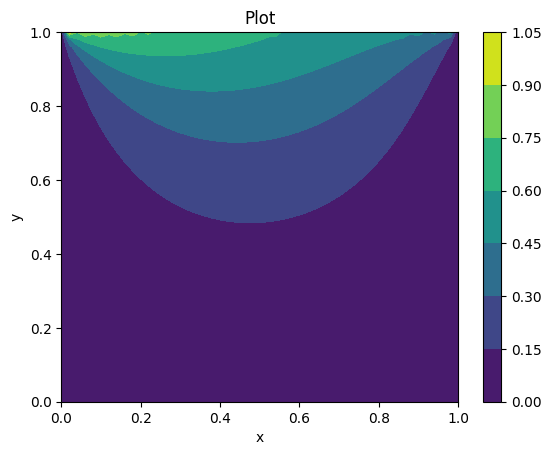

In [12]:
for i in range(num_c):
  poisson_plot(x_new,y_new, data_all[i][3],51,51)

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("txy3.csv")
data

In [ ]:
# make model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import random

# prepare numpy array from data_all

# spliting in train and test
random.shuffle(data_all)
num_instances = len(data_all)
split_point = 0.8
data_test = data_all[int(split_point*num_instances):]
data_all = data_all[0:int(split_point*num_instances)]
num_instances = len(data_all)

print(f'Data size: {num_instances}')

train_data = []
train_label = []

for d in data_all:
  data_c0 = d[0]
  data_c1 = d[1]
  data_c2 = d[2]
  train_data.append([data_c0, data_c1, data_c2])
  train_label.append(d[3])

train_data = tf.convert_to_tensor(train_data, dtype=tf.float32)
train_label = tf.convert_to_tensor(train_label, dtype=tf.float32)

test_data = []
test_label = []

for d in data_test:
  data_c0 = d[0]
  data_c1 = d[1]
  data_c2 = d[2]
  test_data.append([data_c0, data_c1, data_c2])
  test_label.append(d[3])

test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)
test_label = tf.convert_to_tensor(test_label, dtype=tf.float32)

input_shape = train_data.shape[1]
output_shape = train_label.shape[1]

# change model here
model = Sequential()
model.add(Dense(10, input_shape=(input_shape,)))
model.add(Dense(5))
model.add(Dense(output_shape))


model.compile(loss=tf.keras.losses.mae, # mean absolute error
              optimizer=tf.keras.optimizers.Adam(), # Adam optimizer
              metrics=["accuracy", "mae", "mse"])


history = model.fit(train_data, train_label, batch_size=20, epochs=100, verbose=1, validation_split=0.2)


In [ ]:
# prediction
c_predict = [[0.764, 0.173, 0.215]]
c_predict = tf.convert_to_tensor(c_predict, dtype=tf.float32)
prediction = model.predict(c_predict)
poisson_plot(x_new,y_new, prediction[0],51,51)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

test_metrics = model.evaluate(test_data, test_label)
print('+++++ Test Metrics +++++')
print(f'Test Loss {test_metrics[0]}')
print(f'Test Accuracy {test_metrics[1]}')
print(f'Test MSE {test_metrics[2]}')
print(f'Test MSE {test_metrics[3]}')
